In [128]:
import pandas as pd
import numpy as np
import math


In [129]:
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [130]:
df = df[::-1]

In [131]:

forecast_col = "Close"
forecast_out = int((math.ceil(0.01 * len(df))))
df['label'] = df[forecast_col].shift(-forecast_out)


In [132]:
from sklearn import preprocessing, cross_validation
X = np.array(df.drop(['label','Date'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [133]:
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)

In [134]:
from matplotlib import style
import datetime as dt
style.use('ggplot')
df['Forecast'] = np.nan
last_date = df.iloc[-1].Date
print(last_date)
last_unix = dt.datetime.strptime(last_date,"%d-%b-%y")
one_day = 86400
next_unix = last_unix + dt.timedelta(0,one_day)
next_unix = (next_unix - dt.datetime(1970,1,1)).total_seconds()

7-Sep-17


In [135]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [136]:
next_unix = 1505952000.0
for i in forecast_set:
    next_date = dt.datetime.fromtimestamp(int(next_unix))
    next_unix = next_unix +  86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
        

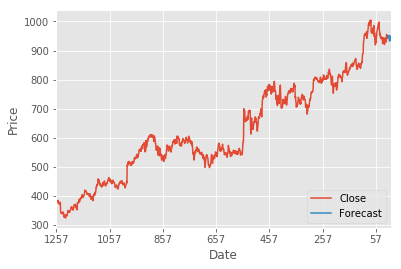

In [137]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()